### Landscape

Define the landscape with parameter resolutions (granularity) and parameter bounds.
The order of the parameters corresponds to their order in the VQA ansatz definition. In the case of qiskit QAOA, the order is all betas and then all gammas.

In [4]:

np.linspace(0,64,65)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.])

In [5]:
from oscar import Landscape
import numpy as np

resolution = [64, 64]
bounds = [(0, 63), (0, 63)]
landscape = Landscape(resolution, bounds)

### Executor

In [6]:
from __future__ import annotations
from collections.abc import Sequence
from oscar import CustomExecutor


def f(params: Sequence[float]) -> float:
    return np.log((params[0]+params[1])/128+1)


custom_executor = CustomExecutor(f)

### Reconstruction

In [12]:
_ = landscape.sample_and_run(custom_executor, sampling_fraction=1 / 50, rng=42)

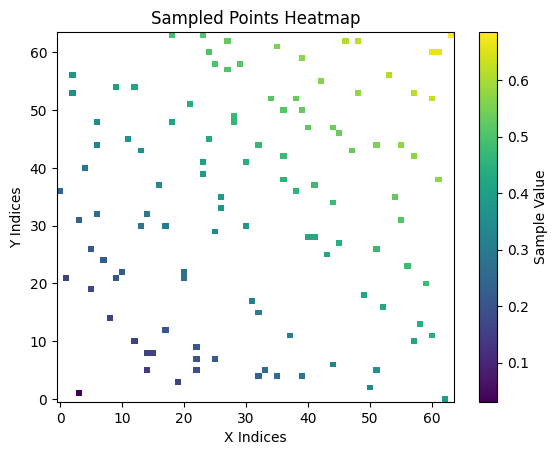

In [13]:
import numpy as np
import matplotlib.pyplot as plt

x_indices = landscape.sampled_indices_unravelled[0]
y_indices = landscape.sampled_indices_unravelled[1]

x_min, x_max = x_indices.min(), x_indices.max()
y_min, y_max = y_indices.min(), y_indices.max()

heatmap = np.full((resolution[0], resolution[1]), np.nan)

for i, (x, y) in enumerate(zip(x_indices, y_indices)):
    heatmap[x, y] = landscape.sampled_landscape[i]

plt.imshow(heatmap, cmap='viridis', origin='lower', aspect='auto')
plt.colorbar(label='Sample Value')
plt.title('Sampled Points Heatmap')
plt.xlabel('X Indices')
plt.ylabel('Y Indices')
plt.show()


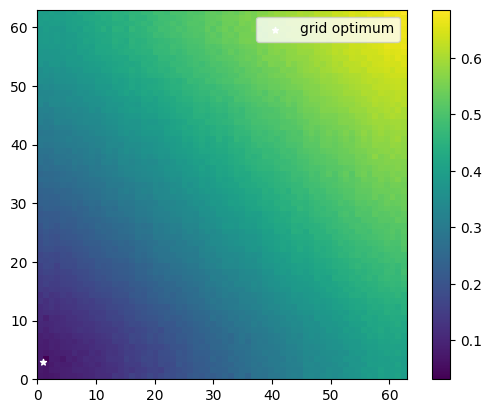

In [14]:
from oscar import CSReconstructor, plot_2d_landscape

reconstructor = CSReconstructor()
landscape.reconstruct(reconstructor)
figure = plot_2d_landscape(landscape)